In [1]:
!pip install stravalib

In [18]:
!pip install stravaio


  Could not find a version that satisfies the requirement loguru (from versions: )
No matching distribution found for loguru


In [ ]:
https://pypi.org/project/stravaio/

In [19]:
from stravaio import strava_oauth2

strava_oauth2(client_id=STRAVA_CLIENT_ID, client_secret=STRAVA_CLIENT_SECRET)

ImportError: No module named stravaio

In [38]:
import flask
import urllib
import urllib.parse



def strava_oauth2(client_id=None, client_secret=None):
    """Run strava authorization flow. This function will open a default system
    browser alongside starting a local webserver. The authorization procedure will be completed in the browser.
    The access token will be returned in the browser in the format ready to copy to the .env file.
    
    Parameters:
    -----------
    client_id: int, if not provided will be retrieved from the STRAVA_CLIENT_ID env viriable
    client_secret: str, if not provided will be retrieved from the STRAVA_CLIENT_SECRET env viriable
    """
    if client_id is None:
        client_id = os.getenv('STRAVA_CLIENT_ID', None)
        if client_id is None:
            raise ValueError('client_id is None')
    if client_secret is None:
        client_secret = os.getenv('STRAVA_CLIENT_SECRET', None)
        if client_secret is None:
            raise ValueError('client_secret is None')
    
    port = 8000
    _request_strava_authorize(client_id, port)


    token = run_server_and_wait_for_token(
        port=port,
        client_id=client_id,
        client_secret=client_secret
    )

    return token

def _request_strava_authorize(client_id, port):
    params_oauth = {
        "client_id": client_id,
        "response_type": "code",
        "redirect_uri": "http://localhost:{port}/authorization_successful".format(port=port),
        "scope": "read,profile:read_all,activity:read",
        "state": 'https://github.com/sladkovm/strava-http',
        "approval_prompt": "force"
    }
    values_url = urllib.parse.urlencode(params_oauth)
    base_url = 'https://www.strava.com/oauth/authorize'
    rv = base_url + '?' + values_url
    webbrowser.get().open(rv)
    return None


def run_server_and_wait_for_token(port, client_id, client_secret):
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind(('127.0.0.1', port))
        s.listen()
        conn, addr = s.accept()

        request_bytes = b''
        with conn:
            while True:
                chunk = conn.recv(512)
                request_bytes += chunk

                if request_bytes.endswith(b'\r\n\r\n'):
                    break
            conn.sendall(b'HTTP/1.1 200 OK\r\n\r\nsuccess\r\n')

        request = request_bytes.decode('utf-8')
        status_line = request.split('\n', 1)[0]
        
        method, raw_url, protocol_version = status_line.split(' ')
        
        url = urllib.parse.urlparse(raw_url)
        query_string = url.query
        query_params = urllib.parse.parse_qs(query_string, keep_blank_values=True)

        if url.path == "/authorization_successful":
            code = query_params.get('code')[0]
            logger.debug("code: {code}".format(code=code))
            params = {
                "client_id": client_id,
                "client_secret": client_secret,
                "code": code,
                "grant_type": "authorization_code"
            }
            r = requests.post("https://www.strava.com/oauth/token", params)
            data = r.json()
        else:
            data = url.path.encode()
        
        return data

In [39]:
strava_oauth2(client_id=credentials['ClientId'], client_secret=credentials['ClientSecret'])

AttributeError: 'module' object has no attribute 'parse'

In [2]:
import pandas as pd
import os
import json

from stravalib.client import Client
from stravalib import unithelper

import datetime
import calendar


import matplotlib
from matplotlib import pyplot as plt
plt.style.use('ggplot')



In [3]:
strava_credentials='{0}/strava_credentials.json'.format(os.getenv("HOME"))
json_data=open(strava_credentials).read()
credentials = json.loads(json_data)
client = Client(access_token=credentials['AccessToken'])

In [5]:
url = client.authorization_url(client_id=credentials['ClientId'],
                               redirect_uri='http://127.0.0.1:5000/authorization')

In [10]:
from flask import render_template, Flask

In [14]:
import os
os.chdir("/Users/lpozzi/repos/polso/strava/")

In [16]:
!ls

__init__.py     login.html      strava_dash.py  strava_dash.pyc


https://stackoverflow.com/questions/17206728/attributeerror-nonetype-object-has-no-attribute-app

In [15]:
app = Flask('LPdash')
#app.config.from_envvar('APP_SETTINGS')

render_template('login.html', authorize_url=url)


AttributeError: 'NoneType' object has no attribute 'app'

In [6]:
code = request.args.get('code') # e.g.
client = Client()
access_token = client.exchange_code_for_token(client_id=MY_STRAVA_CLIENT_ID,
                                              client_secret=MY_STRAVA_CLIENT_SECRET,
                                              code=code)

NameError: name 'request' is not defined

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys

sys.path.append("/Users/lpozzi/repos/polso/strava/")

import pandas as pd

from IPython.display import Markdown

from strava_dash import StravaScraper

`2nd to 8th September slot 1 Spring tide`

https://tides.mobilegeographics.com/locations/2089.html?y=2020&m=9&d=1


In [2]:
ec_distance = 33,796.2 / StravaScraper.M_TO_YD
ec_distance

(33, 728.047475791187)

In [3]:
%%capture
training = StravaScraper()
training.get_swims(after='2019-11-01', before='2020-09-10')
training.get_xtraining(after='2019-11-01', before='2020-09-10')

AccessUnauthorized: Unauthorized: Authorization Error: [{u'field': u'access_token', u'code': u'invalid', u'resource': u'Athlete'}]

## The Plan

| Month    | Days |  Yds/Week  |    X-Train Sesh   |  Running miles  |
| :------- |:---: | :--------: | :---------------: | :-------------: |
| November | 30   |   20,000   | Yoga+Strength+Run         |    |
| December | 31   |   25,000   |    4    |    |
| January  | 31   |   28,000   |    5    |    |
| February | 28   |   30,000   |    5    |    |
| March    | 31   |   30,000   |    5    |    |
| April    | 31   |   35,000   |    3-4  |    |
| May      | 31   |   30,000   |    3-4    |    |
| June     | 30   |   35,000   |    5    |    |
| July     | 31   |   35,000   |    3-4    |    |
| August   | 31   |   20.000   |   Yoga    |    |

## The Execution

In [9]:
from IPython.display import Markdown

Markdown("""
##### Total Yards: {0} 
""".format(training.total_yards))


##### Total Yards: 649035 


In [4]:
training.monthly_yardage

distance      hours  weekly distance
January   39425.077944  12.580278      9856.269486
February  79435.346599  25.206111     19858.836650
March     86772.922894  27.959444     21693.230724
April     73909.116547  23.843333     18477.279137
May       81544.592206  26.697778     20386.148052
June      86922.419381  27.099722     21730.604845
July      65743.568121  22.673889     16435.892030
August    92692.961907  26.205000     23173.240477
November   9008.284292   2.866944      2252.071073
December  33580.716743  11.211667      8395.179186

In [ ]:
avg_x_train = training.x_training.groupby(['ds_week_ending', 
                                           'month']).count().reset_index().groupby(
    'month').activity.mean()
avg_x_train.index = avg_x_train.index.map(lambda x: datetime.date(1900, x, 1).strftime('%B'))

training.monthly_yardage.merge(
    pd.DataFrame({'avg_x_train': avg_x_train}), right_index=True, left_index=True).loc[['December', 'January', 
                                                                                        'February', 'March', 'April', 
                                                                                        'May', 'June', 'July',
                                                                                        'August']]


## Yards

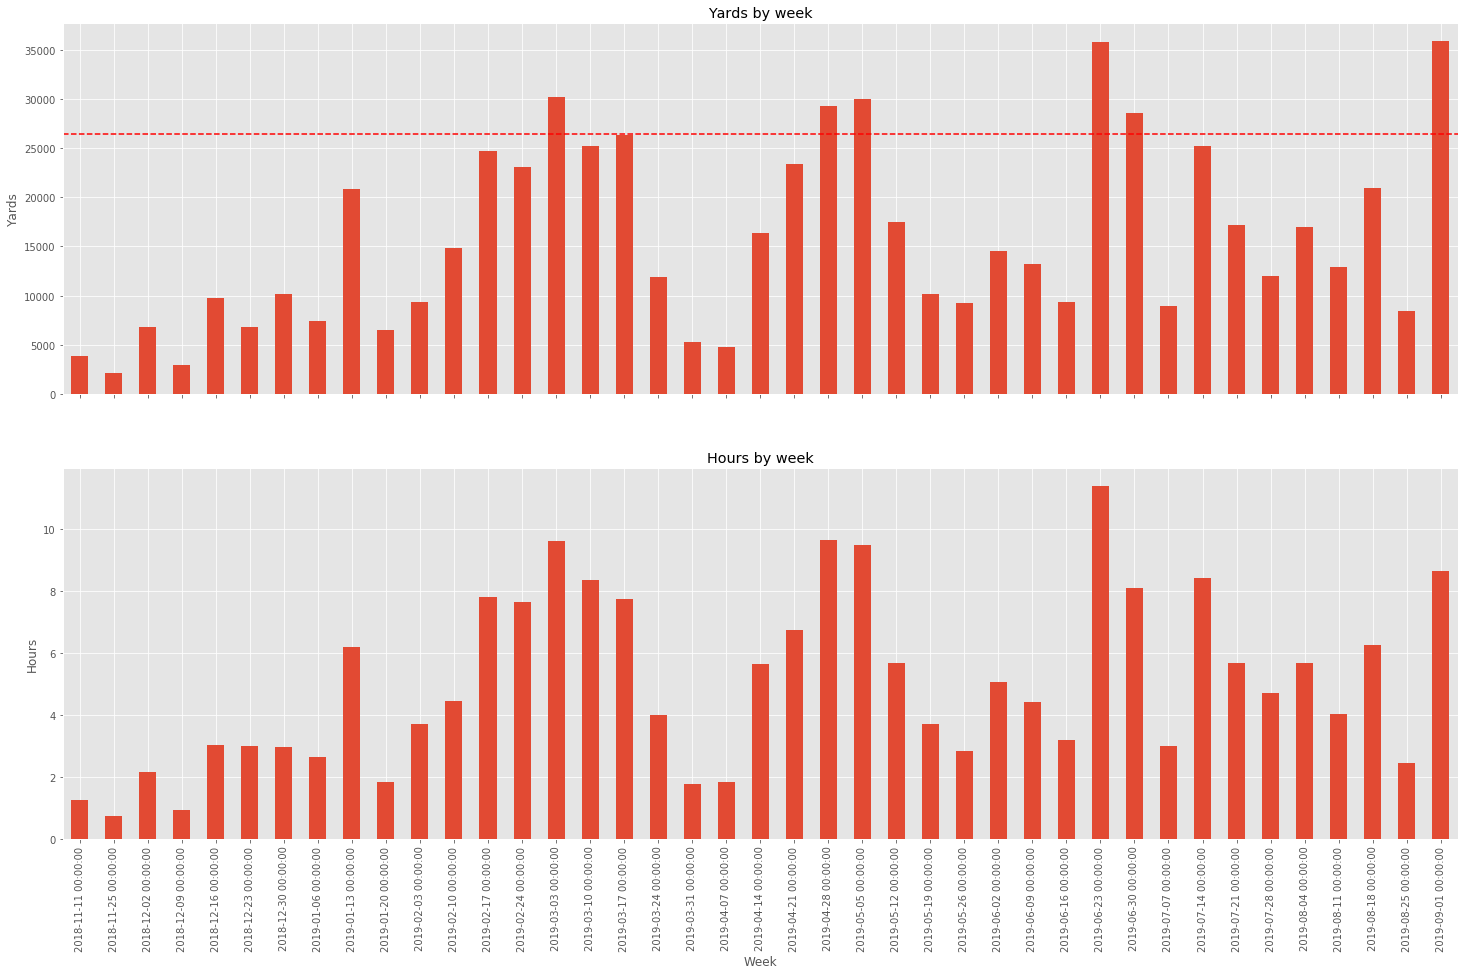

In [5]:
tmp = training.plot_summary(yardage_goal=tsugaru_distance)

## In N Out

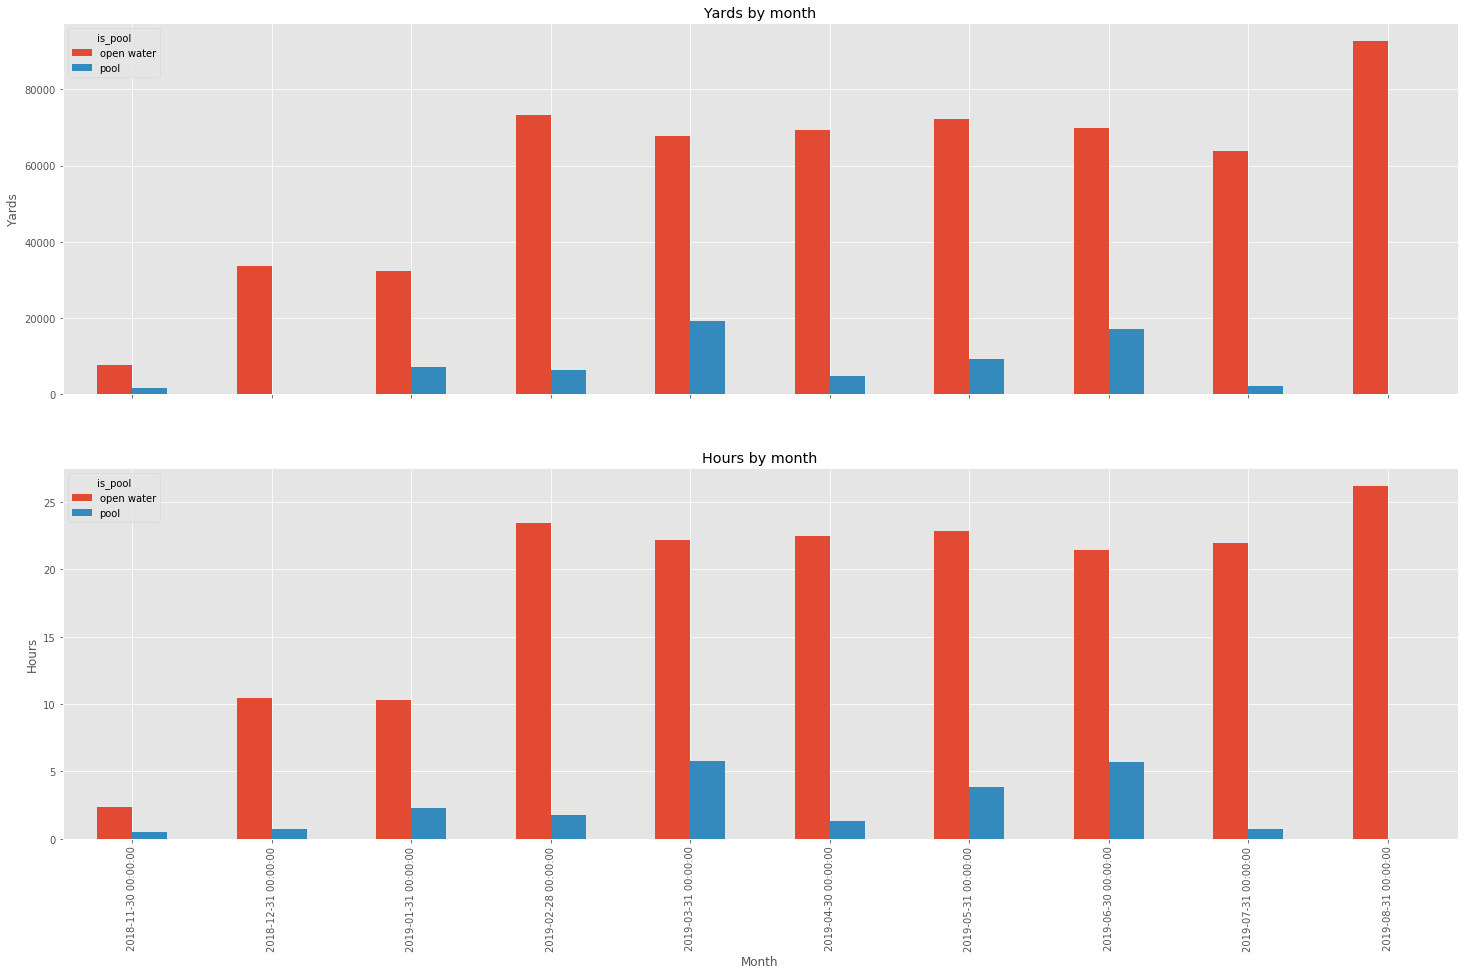

In [6]:
tmp = training.plot_summary(in_n_out=True, by='month')

## Crosstraining

In [50]:
training.x_training.activity.unique()

array([u'Rowing', u'Run', u'WeightTraining', u'Yoga'], dtype=object)

In [55]:
swims = training.swims
swims['activity'] = swims['is_pool'].apply(lambda x: {'open water': 'OpenWater', 'pool':'Pool'}[x])
full_training = pd.concat([swims[training.x_training.columns], training.x_training])
full_training.groupby('activity')['elapsed_time'].sum().apply(lambda x: x / 3600)

activity
OpenWater         183.697222
Pool               22.646944
Rowing              5.966944
Run                10.808889
WeightTraining     25.333333
Yoga                8.333333
Name: elapsed_time, dtype: float64

In [56]:
full_training.groupby(['ds_month_ending', 'activity'])['elapsed_time'].sum().apply(lambda x: x / 3600).unstack()

activity         OpenWater      Pool    Rowing       Run  WeightTraining  \
ds_month_ending                                                            
2018-11-30        2.366944  0.500000       NaN  0.692778             NaN   
2018-12-31       10.461667  0.750000       NaN  3.676111        3.000000   
2019-01-31       10.330278  2.250000       NaN  0.269444        1.000000   
2019-02-28       23.456111  1.750000  0.250000  0.313056        4.000000   
2019-03-31       22.151667  5.807778       NaN  0.508889        3.000000   
2019-04-30       22.510000  1.333333  0.116667  1.394722        4.000000   
2019-05-31       22.864444  3.833333       NaN  1.431111        3.000000   
2019-06-30       21.427222  5.672500       NaN       NaN        3.333333   
2019-07-31       21.923889  0.750000       NaN  2.134444        3.000000   
2019-08-31       26.205000       NaN  5.600278  0.388333        1.000000   

activity             Yoga  
ds_month_ending            
2018-11-30       1.333333  
2018-12-31            NaN  
2019-01-31       2.000000  
2019-02-28       3.000000  
2019-03-31       1.000000  
2019-04-30       1.000000  
2019-05-31            NaN  
2019-06-30            NaN  
2019-07-31            NaN  
2019-08-31            NaN

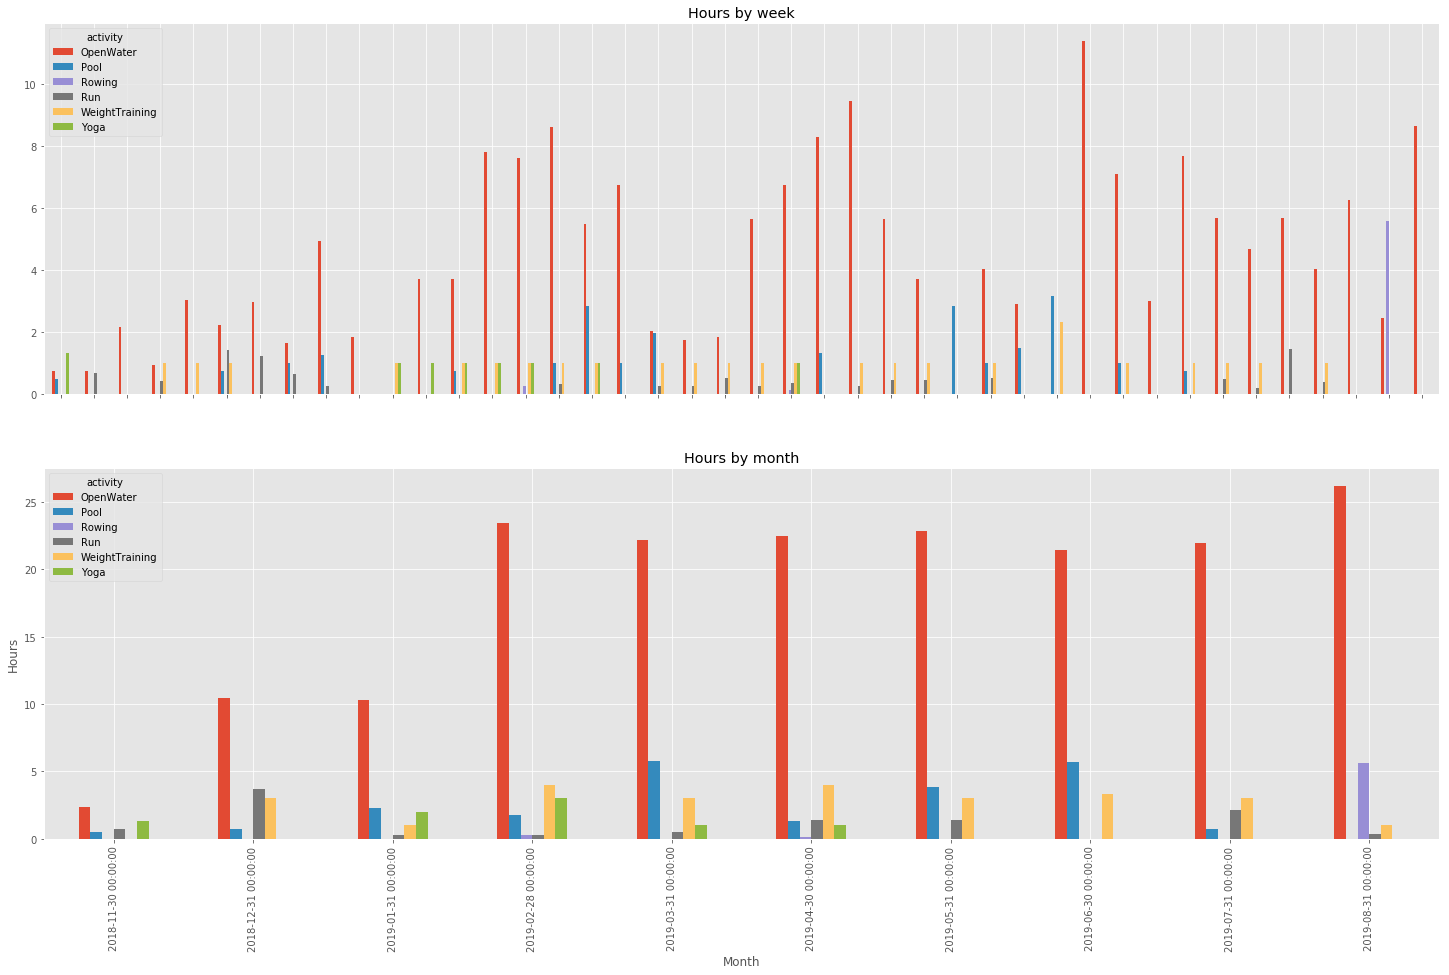

In [7]:
tmp=training.plot_x_training()

### Year on Year

In [21]:
%%capture
training_old = StravaScraper()
training_old.get_swims(after='2017-11-01', before='2018-09-30')

In [22]:
Markdown("""
##### Year on Year: 2018/2019 = {0:%} 2017/2018
""".format(training.total_yards / float(training_old.total_yards)))  


##### Year on Year: 2018/2019 = 69.332457% 2017/2018


In [23]:
training.in_out / training_old.in_out

total  percentage
is_pool                         
open water  0.894654    1.290384
pool        0.234299    0.337935

In [42]:
train_dummy = StravaScraper()
total_yards = []
in_out = []
for after, before in [('2017-01-01', '2017-09-05'),
                      ('2017-11-01', '2018-09-30'), 
                      ('2018-11-01', '2019-09-01')]:
    train_dummy.get_swims(after=after, before=before)
    total_yards.append(train_dummy.total_yards)
    in_out.append(train_dummy.in_out.total)
training_years = pd.merge(pd.DataFrame(total_yards, index=['2017', '2018', '2019']),
                          pd.DataFrame(in_out, index=['2017', '2018', '2019']), 
                          right_index=True, left_index=True)
training_years.columns = ['total_yards', 'open_water', 'pool']

In [43]:
training_years

total_yards     open_water           pool
2017      1151960  685453.094522  466507.013833
2018       936120  650715.010316  285405.744638
2019       649035  582164.801491   66870.205143

# Appendix Full Training

In [10]:
from IPython.display import HTML
HTML(training.get_full_training().to_html())